# CP467: Course Project
Chandler Mayberry (190688910) - Samson Goodenough (190723380)

In [85]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Preparing Objects
Load all object images and assign them names.

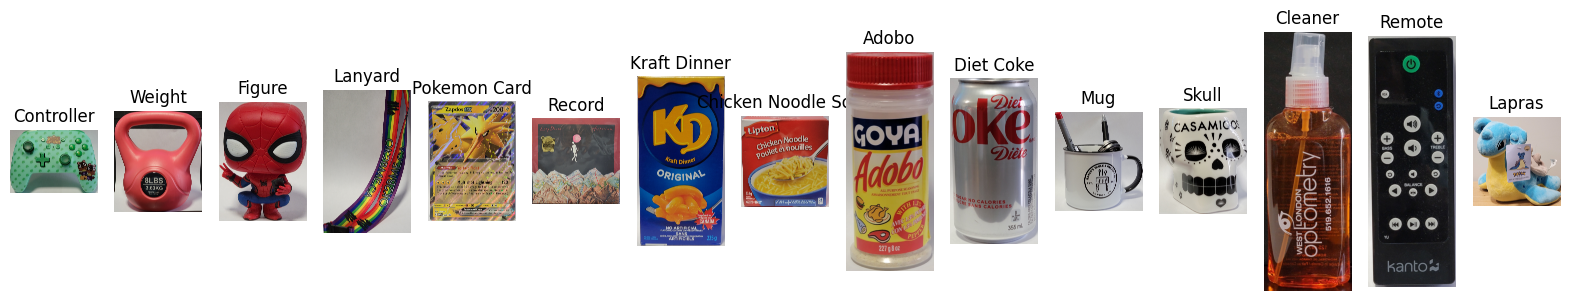

In [86]:
OBJECT_NAMES = {
  "O1.png": "Controller",
  "O2.png": "Chicken Noodle Soup",
  "O3.png": "Adobo",
  "O4.png": "Diet Coke",
  "O5.png": "Mug",
  "O6.png": "Skull",
  "O7.png": "Cleaner",
  "O8.png": "Remote",
  "O9.png": "Lapras",
  "O10.png": "Weight",
  "O11.png": "Figure",
  "O12.png": "Lanyard",
  "O13.png": "Pokemon Card",
  "O14.png": "Record",
  "O15.png": "Kraft Dinner"
}

# load in all of the images
objects = []

# use os to get all of the files in the directory
for file in os.listdir("../Objects/"):
  # read in the image
  img = cv2.imread("../Objects/" + file)
  # convert to correct color
  fixed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # append to the list
  objects.append({"name": OBJECT_NAMES[file], "image": fixed})

# plot the images
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
  # plot each with no axis and filename as title
  plt.subplot(1, len(objects), i+1)
  plt.imshow(objects[i]["image"])
  plt.axis("off")
  plt.title(objects[i]["name"])
plt.show()


## Preparing Scenes
Load all scene images and group them into the different stitchable scenes.

| Group # | Scenes    |
|---------|-----------|
| Group 1 | S1 - S6   |
| Group 2 | S7        |
| Group 3 | S8 - S14  |
| Group 4 | S15 - S19 |
| Group 5 | S20 - S21 |

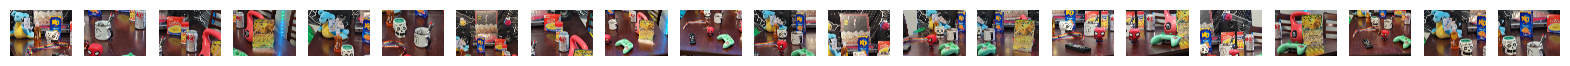

In [106]:
# load in all of the images
scenes = {}
# use os to get all of the files in the directory
for file in os.listdir("../Scenes/"):
  # read in the image
  img = cv2.imread("../Scenes/" + file)
  # convert to correct color
  fixed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # append to the list
  scenes[file] = fixed

# plot the images
plt.figure(figsize=(20, 20))
for i, key in enumerate(scenes):
  # plot each with no axis and filename as title
  plt.subplot(1, len(scenes), i+1)
  plt.imshow(scenes[key])
  plt.axis("off")
plt.show()


## Draw Matches

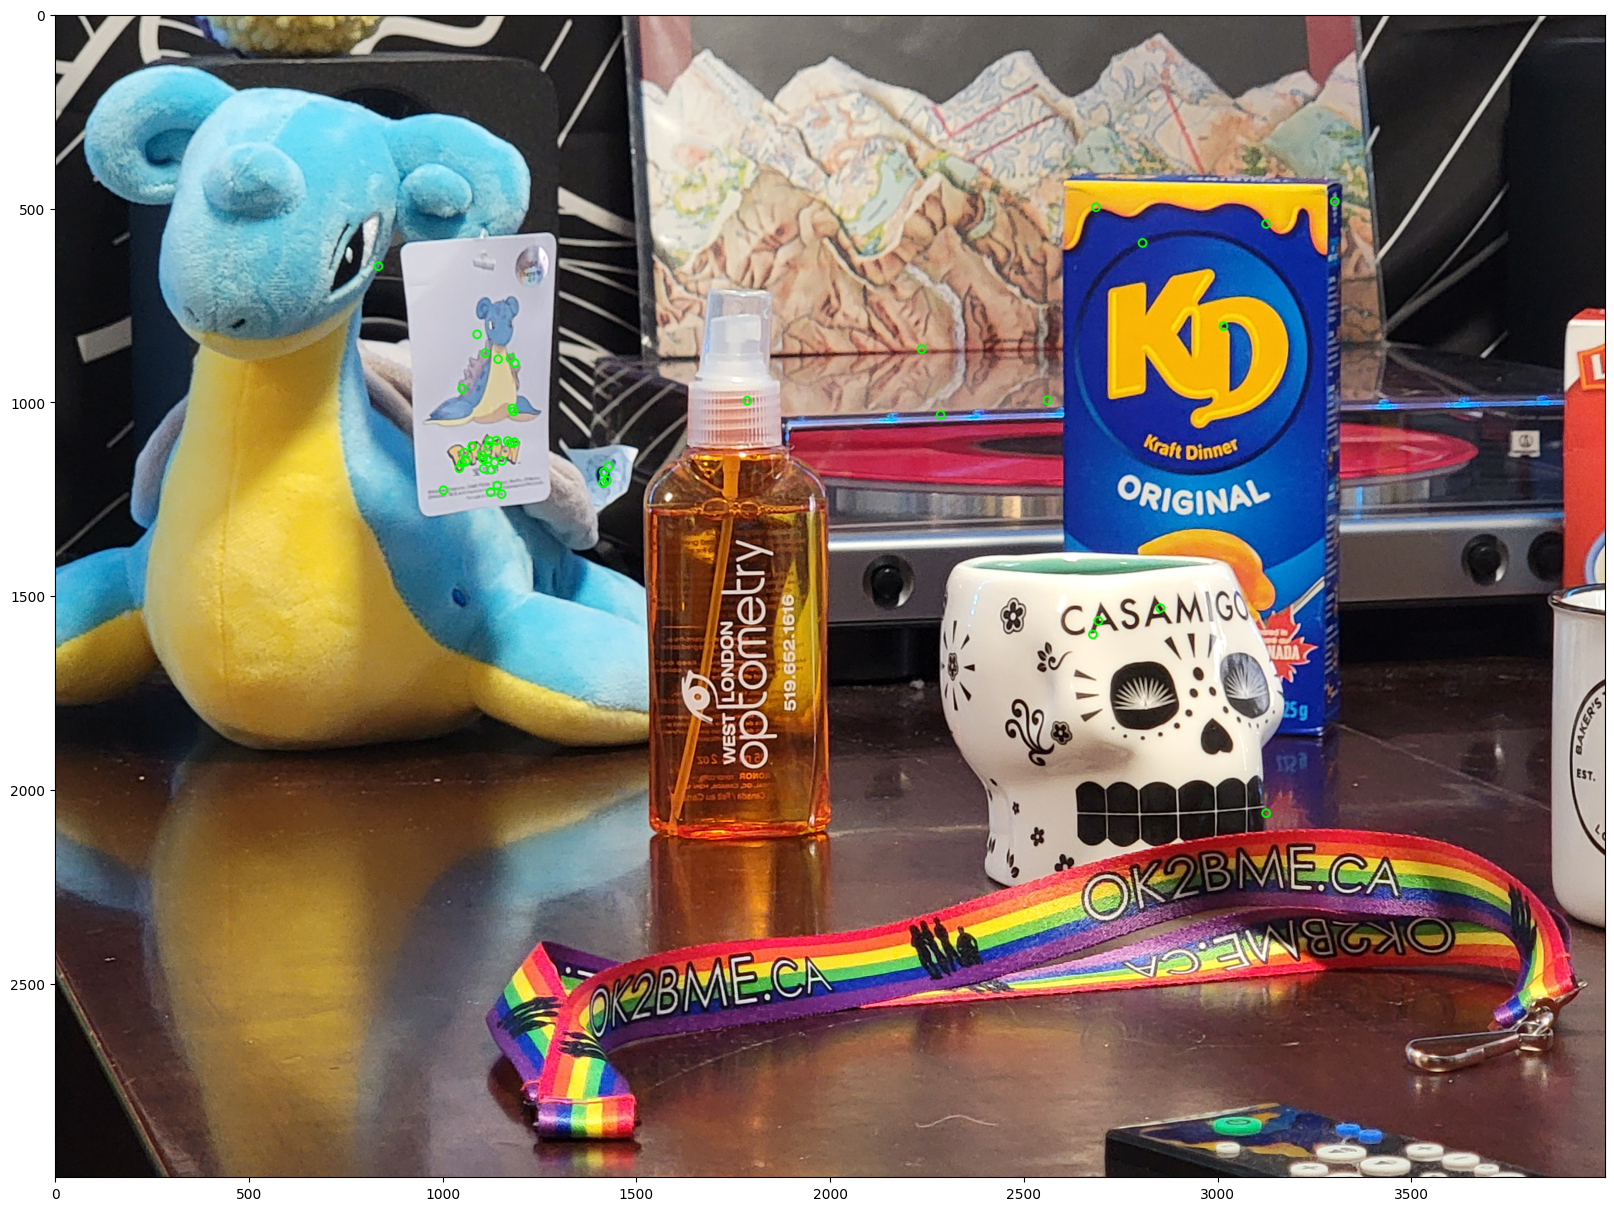

In [94]:
#https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

def detect_objects(test_scene, train_objects, min_matches = 25):
    _test_scene = test_scene.copy()

    for i, obj in enumerate(train_objects):
        test_scene = _test_scene.copy()
        balls = cv2.SIFT_create()

        train_object = obj["image"]
        keypoint, descriptors = balls.detectAndCompute(train_object, None)
        keypoint2, descriptors2 = balls.detectAndCompute(test_scene, None)

        bf = cv2.BFMatcher()

        matches = bf.knnMatch(descriptors, descriptors2, k=2)

        #apply funny ratio 
        good_results = []
        temp = []

        for m,n in matches:
            if m.distance < 0.7*n.distance:
                good_results.append([m])
                temp.append(m)

        if len(good_results) >= min_matches:

            # draw box around detected image
            # temp = temp[:100]
            # src_pts = np.float32([ keypoint[m.queryIdx].pt for m in temp ]).reshape(-1,1,2)
            # dst_pts = np.float32([ keypoint2[m.trainIdx].pt for m in temp ]).reshape(-1,1,2)
            # M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            # matchesMask = mask.ravel().tolist()
            # h, w, _ = train_object.shape
            # pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            # dst = cv2.perspectiveTransform(pts,M)
            # img2 = cv2.polylines(test_scene,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)


            # label all of the scene objects
            #https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576
            # cv2.putText(img = img2, text=obj['name'], org=(int(dst[0][0][0]), int(dst[1][0][1])), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=3, color=(0, 0, 0), thickness=4, lineType=cv2.FILLED, bottomLeftOrigin = False)

            # img2 = cv2.drawKeypoints(img2, keypoint2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            # draw_params = dict(matchColor = (0,255,0,0), # draw matches in green color
            #                 singlePointColor = (255,0,0),
            #                 matchesMask = matchesMask, # draw only inliers
            #                 flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

            # img3 = cv2.drawMatches(train_object, keypoint,img2,keypoint2,temp,None,**draw_params)
            
            img2 = test_scene.copy()
            
            for match in good_results:
                cv2.circle(img2, (int(keypoint2[match[0].trainIdx].pt[0]), int(keypoint2[match[0].trainIdx].pt[1])), 10, (0, 255, 0), 3)

            train_object = cv2.resize(train_object, (0, 0), fx=0.5, fy=0.5)
            
            height = max(img2.shape[0], train_object.shape[0])
            width = img2.shape[1] + train_object.shape[1]
            
            combined_image = np.zeros((height, width, 3), dtype=np.uint8)
            
            combined_image[:img2.shape[0], :img2.shape[1]] = img2
            combined_image[:train_object.shape[0], img2.shape[1]:] = train_object
            
            # fix color before saving
            combined_image = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)
            
            cv2.imwrite(f"../Matches/{obj['name']}.jpg", combined_image)
    
    return img2



result = []
for key in scenes:
    result.append(detect_objects(scenes[key], objects))
    break


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(result[0])
plt.show()




## Detected with Boxes

In [ ]:
#https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

def detect_objects(test_scene, train_objects, min_matches = 25):
    _test_scene = test_scene.copy()

    for i, obj in enumerate(train_objects):
        test_scene = _test_scene.copy()
        balls = cv2.SIFT_create()

        train_object = obj["image"]
        keypoint, descriptors = balls.detectAndCompute(train_object, None)
        keypoint2, descriptors2 = balls.detectAndCompute(test_scene, None)

        bf = cv2.BFMatcher()

        matches = bf.knnMatch(descriptors, descriptors2, k=2)

        #apply funny ratio 
        good_results = []
        temp = []

        for m,n in matches:
            if m.distance < 0.7*n.distance:
                good_results.append([m])
                temp.append(m)

        if len(good_results) >= min_matches:

            # draw box around detected image
            temp = temp[:100]
            src_pts = np.float32([ keypoint[m.queryIdx].pt for m in temp ]).reshape(-1,1,2)
            dst_pts = np.float32([ keypoint2[m.trainIdx].pt for m in temp ]).reshape(-1,1,2)
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            matchesMask = mask.ravel().tolist()
            h, w, _ = train_object.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)
            img2 = cv2.polylines(test_scene,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)


            # label all of the scene objects
            # https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576
            cv2.putText(img = img2, text=obj['name'], org=(int(dst[0][0][0]), int(dst[1][0][1])), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=3, color=(0, 0, 0), thickness=4, lineType=cv2.FILLED, bottomLeftOrigin = False)
            
            cv2.imwrite(f"../Detected_Objects/{obj['name']}.jpg", img2)
    
    return img2



result = []
for key in scenes:
    result.append(detect_objects(scenes[key], objects))
    break


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(result[0])
plt.show()




## Keypoints

In [110]:
#https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html

def detect_objects(test_scene, train_objects, min_matches = 25):
    _test_scene = test_scene.copy()
    img2 = test_scene.copy()

    for i, obj in enumerate(train_objects):
        balls = cv2.SIFT_create()

        train_object = obj["image"]
        keypoint, descriptors = balls.detectAndCompute(train_object, None)
        keypoint2, descriptors2 = balls.detectAndCompute(test_scene, None)

        bf = cv2.BFMatcher()

        matches = bf.knnMatch(descriptors, descriptors2, k=2)

        #apply funny ratio 
        good_results = []
        temp = []

        for m,n in matches:
            if m.distance < 0.7*n.distance:
                good_results.append([m])
                temp.append(m)

        if len(good_results) >= min_matches:
            for match in good_results:
                cv2.circle(img2, (int(keypoint2[match[0].trainIdx].pt[0]), int(keypoint2[match[0].trainIdx].pt[1])), 10, (0, 255, 0), 3)
                
    
    # fix color before saving
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    return img2



for key in scenes:
    scene_points = detect_objects(scenes[key], objects)
    # cv2.cvtColor(scene_points, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"../Detected_Objects/scene_points{key}", scene_points)
    break


